**the result of the EDA: it turned out that on working days the sales level increases noticeably, on weekends the sales level decreases. We found out that the higher the user's receipt for the order, there is usually a higher service score. We also found out that the average level of sales in cities is the same**

In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [3]:
orders = pd.read_csv('/data/orders.csv')
orders.head()

,Unnamed: 0,order_id,product_id_ord,order_amount,day_of_week,quality_assessment,region,number_product
0,0,1,76,3479.818969,0,6,Moscow,9
1,1,2,98,796.121628,0,1,Moscow region,12
2,2,3,5,635.766395,0,2,Leningrad region,11
3,3,4,85,5357.659968,1,6,Sverdlovsk region,8
4,4,5,67,30.193042,0,3,Novosibirsk region,7


In [4]:
orders = orders.drop('Unnamed: 0', axis=1)
orders.tail()

,order_id,product_id_ord,order_amount,day_of_week,quality_assessment,region,number_product
69995,69996,12,2679.543414,0,6,Moscow,12
69996,69997,51,2626.678834,0,3,Moscow region,3
69997,69998,46,6284.403883,1,9,Leningrad region,3
69998,69999,49,1079.864995,0,1,Sverdlovsk region,1
69999,70000,30,3098.325991,0,6,Novosibirsk region,7


<Axes: xlabel='order_amount'>

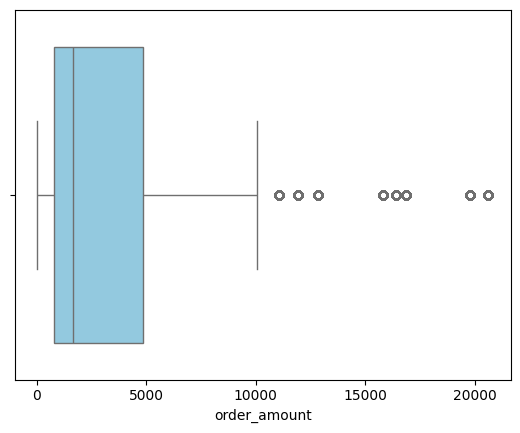

In [45]:
#detecting outliers
sns.boxplot(x=orders['order_amount'], color='skyblue')

In [6]:
#removing outliers using a z-estimate

#calculating the z-score
z_scores = stats.zscore(orders['order_amount'])

#determination of emissions
outliers = orders[(z_scores > 3) | (z_scores < -3)]
outliers.head()

,order_id,product_id_ord,order_amount,day_of_week,quality_assessment,region,number_product
23,24,72,19776.443679,1,5,Sverdlovsk region,12
42,43,72,19776.443679,1,9,Leningrad region,1
56,57,72,19776.443679,1,9,Moscow region,5
70,71,53,20608.770030,1,6,Moscow,10
71,72,72,19776.443679,1,10,Moscow region,11


In [7]:
print(len(outliers['order_amount']))
print(outliers['order_amount'].mean())
print(outliers['order_amount'].max())
print(outliers['order_amount'].min())
print(outliers['order_amount'].head())

1455
20198.041287452903
20608.7700299446
19776.44367851644
23    19776.443679
42    19776.443679
56    19776.443679
70    20608.770030
71    19776.443679
Name: order_amount, dtype: float64


In [8]:
#checking for missing values
orders.isnull().sum()

order_id              0
product_id_ord        0
order_amount          0
day_of_week           0
quality_assessment    0
region                0
number_product        0
dtype: int64

In [9]:
orders.describe()

,order_id,product_id_ord,order_amount,day_of_week,quality_assessment,number_product
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,35000.500000,49.910171,3670.147144,0.302043,4.392729,7.531843
std,20207.403759,28.620694,4496.229726,0.459147,2.354412,4.017076
min,1.000000,1.000000,30.193042,0.000000,1.000000,1.000000
25%,17500.750000,25.000000,796.121628,0.000000,3.000000,4.000000
50%,35000.500000,50.000000,1632.444866,0.000000,4.000000,8.000000
75%,52500.250000,75.000000,4844.776857,1.000000,6.000000,11.000000
max,70000.000000,99.000000,20608.770030,1.000000,10.000000,14.000000


<Axes: xlabel='order_amount', ylabel='Density'>

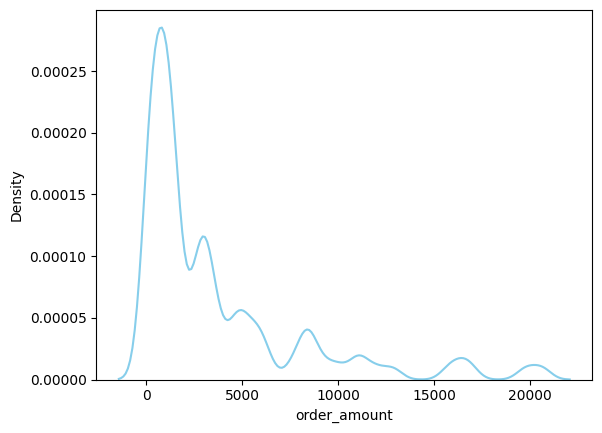

In [11]:
sns.kdeplot(data = orders, x = 'order_amount', color='skyblue')

In [13]:
corr_orders = orders.drop('product_id_ord', axis=1).drop('region', axis=1)
corr_orders.corr()

,order_id,order_amount,day_of_week,quality_assessment,number_product
order_id,1.000000,-0.006796,-0.003212,-0.005955,0.000261
order_amount,-0.006796,1.000000,0.795592,0.473789,0.002714
day_of_week,-0.003212,0.795592,1.000000,0.587621,0.000745
quality_assessment,-0.005955,0.473789,0.587621,1.000000,0.002372
number_product,0.000261,0.002714,0.000745,0.002372,1.000000


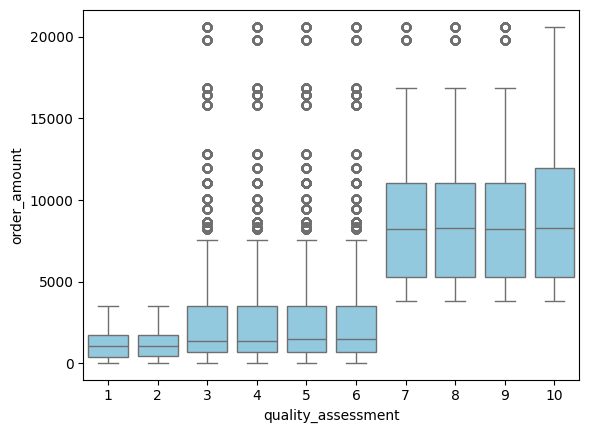

In [44]:
sns.boxplot(x='quality_assessment', y='order_amount', data=corr_orders, color='skyblue')
plt.show()

In [43]:
#dependence of the purchase amount on the day of the week (AB test)

In [48]:
#dividing the table into a day off and a working day
weekend_A = corr_orders[corr_orders['day_of_week']==0]
working_B = corr_orders[corr_orders['day_of_week']==1]
weekend_A.head()

,order_id,order_amount,day_of_week,quality_assessment,number_product
0,1,3479.818969,0,6,9
1,2,796.121628,0,1,12
2,3,635.766395,0,2,11
4,5,30.193042,0,3,7
5,6,3209.275412,0,2,2


In [49]:
working_B.head()

,order_id,order_amount,day_of_week,quality_assessment,number_product
3,4,5357.659968,1,6,8
7,8,16862.020254,1,7,14
11,12,4529.601785,1,5,1
15,16,4806.037922,1,9,1
18,19,15803.664671,1,6,11


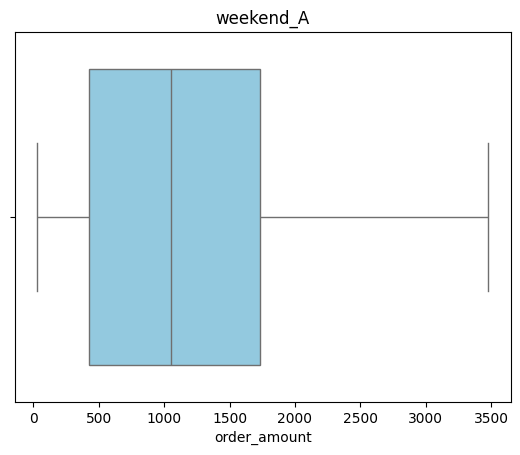

In [57]:
sns.boxplot(data=weekend_A, x='order_amount', color='skyblue')
plt.title('weekend_A')
plt.show()

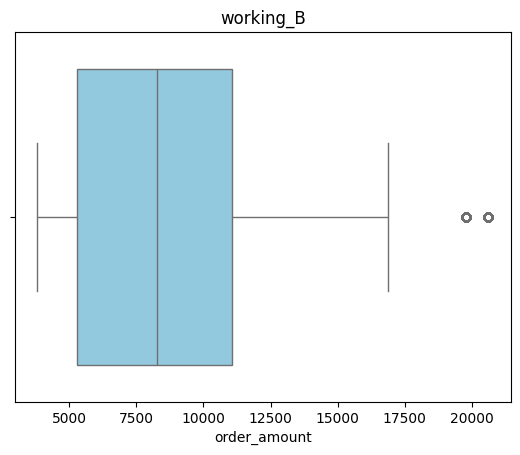

In [58]:
sns.boxplot(data=working_B, x='order_amount', color='skyblue')
plt.title('working_B')
plt.show()

In [65]:
#t test
t_statistic, p_value = ttest_ind(weekend_A['order_amount'], working_B['order_amount'])
if p_value < 0.05:
  print('The differences between weekday and weekend sales are statistically significant')
else:
  print('The differences between weekday and weekend sales are not statistically significant')


The differences between weekday and weekend sales are statistically significant


In [66]:
#let's find out the level of sales by city
orders_city = orders.groupby('region').mean('order_amount')
orders_city.head()

,order_id,product_id_ord,order_amount,day_of_week,quality_assessment,number_product
region,,,,,,
Leningrad region,35000.5,49.807000,3642.922072,0.299143,4.377000,7.512786
Moscow,34998.5,49.624571,3675.598079,0.300214,4.431214,7.515643
Moscow region,34999.5,49.859071,3675.854892,0.301786,4.382571,7.522143
Novosibirsk region,35002.5,49.982929,3693.786932,0.305214,4.386500,7.558500
Sverdlovsk region,35001.5,50.277286,3662.573743,0.303857,4.386357,7.550143
